In [1]:
## ADD SOME PROJECT INTRODUCTION


### Loading the libraries and the dataset

In [2]:
# importing the libraries

import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# libraries for data and statistical modeling
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.stats import pearsonr,spearmanr,f_oneway,chi2_contingency

In [3]:
sales_df = pd.read_csv(r'C:\Users\hp\Desktop\New folder\Python Data Class\Data Science -- Machine Learning\data\cleaned_marketing.csv')

In [4]:
sales_df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


### DATA WRANGLING

Strategy:
1. drop unwanted columns
2. handle conflicting datatypes
3. check and handle null values 
4. generate some new columns for more context.

In [5]:
sales_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# generate age column and also drop year of birth and ID

sales_df['age'] = [2024 - x for x in sales_df['Year_Birth']]
sales_df.drop(columns= ['ID', 'Year_Birth'], inplace= True)

In [7]:
# handle conflicting data types 

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education            2240 non-null   object
 1   Marital_Status       2240 non-null   object
 2   Income               2240 non-null   object
 3   Kidhome              2240 non-null   int64 
 4   Teenhome             2240 non-null   int64 
 5   Dt_Customer          2240 non-null   object
 6   Recency              2240 non-null   int64 
 7   MntWines             2240 non-null   int64 
 8   MntFruits            2240 non-null   int64 
 9   MntMeatProducts      2240 non-null   int64 
 10  MntFishProducts      2240 non-null   int64 
 11  MntSweetProducts     2240 non-null   int64 
 12  MntGoldProds         2240 non-null   int64 
 13  NumDealsPurchases    2240 non-null   int64 
 14  NumWebPurchases      2240 non-null   int64 
 15  NumCatalogPurchases  2240 non-null   int64 
 16  NumSto

In [8]:
# manually removing null values

sales_df = sales_df[sales_df['Income'] != ' ']
sales_df.reset_index(drop=True, inplace=True)

In [9]:
# correcting income and dt_customer datatype

sales_df['Dt_Customer'] = sales_df['Dt_Customer'].apply(pd.to_datetime)
sales_df = sales_df.astype({'Income':'int'})

In [10]:
sales_df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
dtype: int64

### Data Visualisation

* Subplots of Demographic Variables
* Subplots of scatter chart
* Distribution plot for continous variables 

In [11]:
sales_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age'],
      dtype='object')

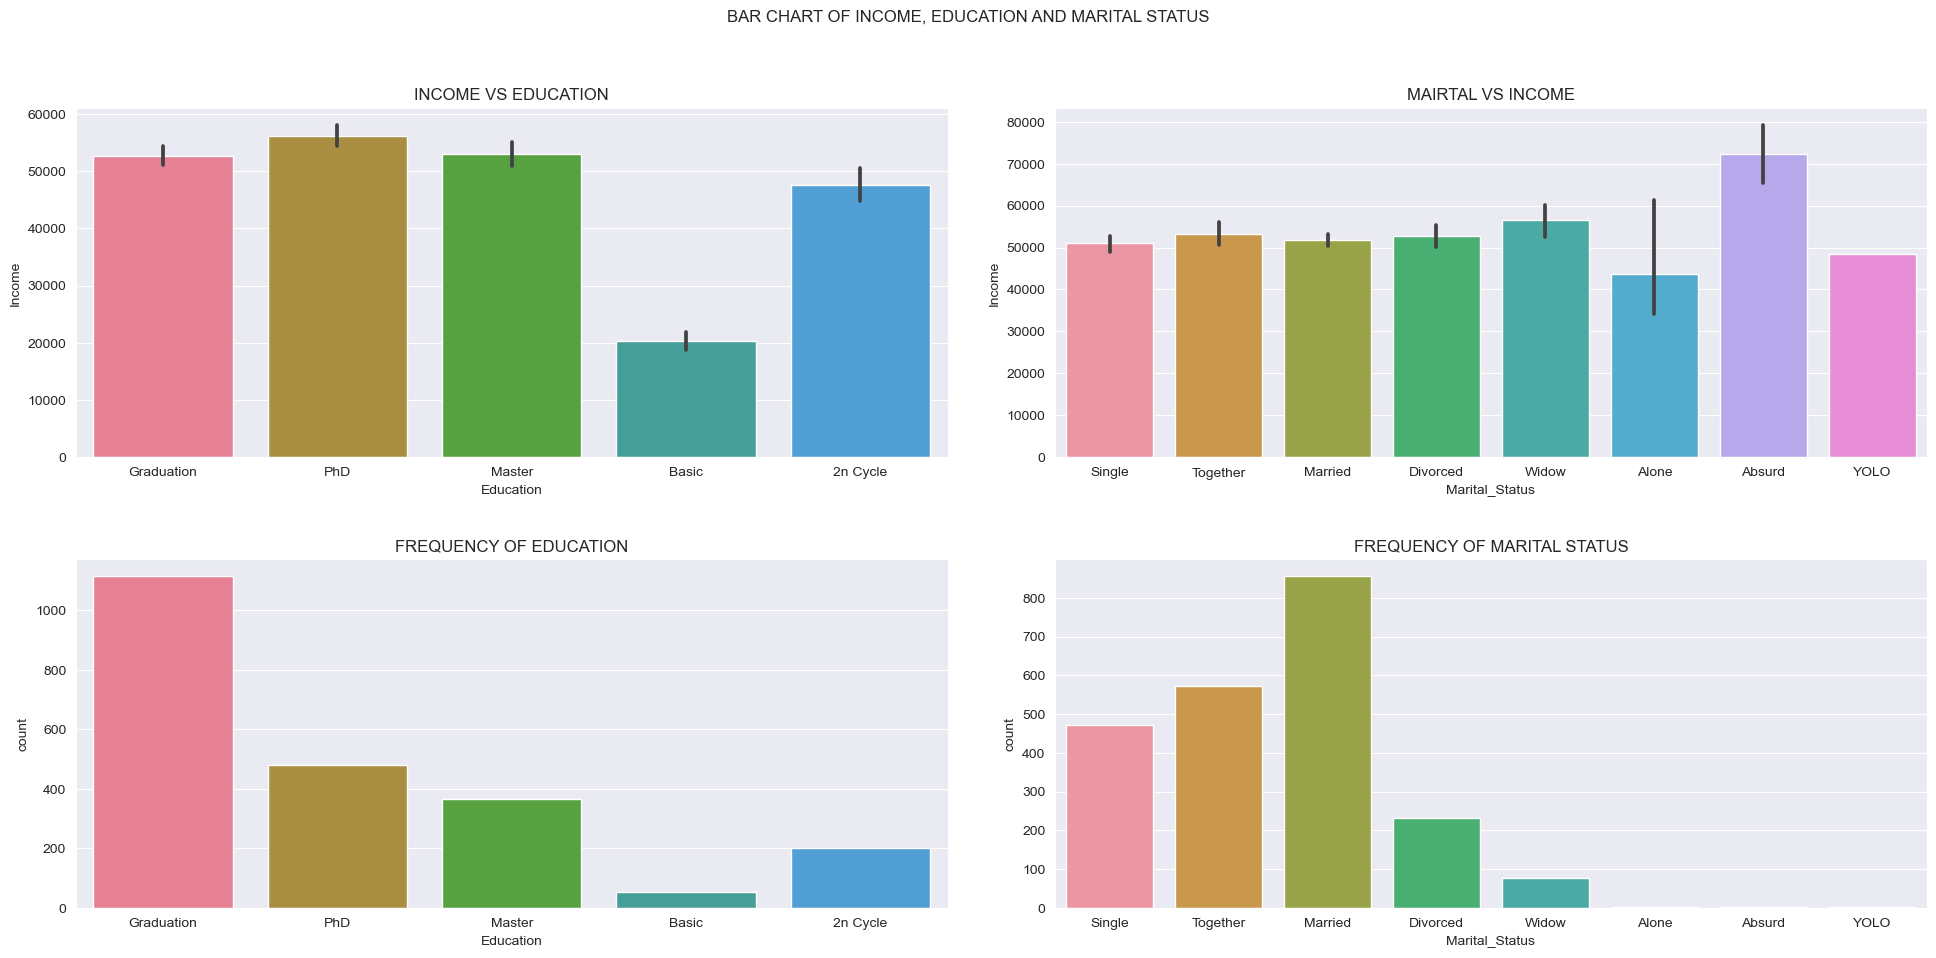

In [12]:
sns.set_style('darkgrid')
sns.set_palette('husl')


fig, axes = plt.subplots(2,2, figsize = (20,10))

sns.barplot(data= sales_df, x = 'Education', y = 'Income', ax=axes[0,0])
sns.barplot(data= sales_df, x = 'Marital_Status', y = 'Income', ax=axes[0,1])
sns.countplot(data= sales_df, x = 'Education', ax=axes[1,0])
sns.countplot(data= sales_df, x = 'Marital_Status', ax=axes[1,1])

axes[0,0].set_title('INCOME VS EDUCATION')
axes[0,1].set_title('MAIRTAL VS INCOME')
axes[1,0].set_title('FREQUENCY OF EDUCATION')
axes[1,1].set_title('FREQUENCY OF MARITAL STATUS')

plt.suptitle('BAR CHART OF INCOME, EDUCATION AND MARITAL STATUS')

fig.tight_layout(pad= 3)


#### INSIGHT



In [13]:
def get_chart(x, y, dim, title):
    
    fig, axes = plt.subplots(dim[0],dim[1], figsize = (20,10))
    sns.barplot(data= sales_df, x = x[0], y = y[0], ax=axes[0,0])
    sns.barplot(data= sales_df, x = x[1], y = y[0], ax=axes[0,1])
    sns.barplot(data= sales_df, x = x[0], y = y[1], ax=axes[1,0])
    sns.barplot(data= sales_df, x = x[1], y = y[1], ax=axes[1,1])

    axes[0,0].set_title(f'{x[0].upper()} VS {y[0].upper()}')
    axes[0,1].set_title(f'{x[1].upper()} VS {y[0].upper()}')
    axes[1,0].set_title(f'{x[0].upper()} VS {y[1].upper()}')
    axes[1,1].set_title(f'{x[1].upper()} VS {y[1].upper()}')
    
    fig.tight_layout(pad=3)


    plt.suptitle(title)

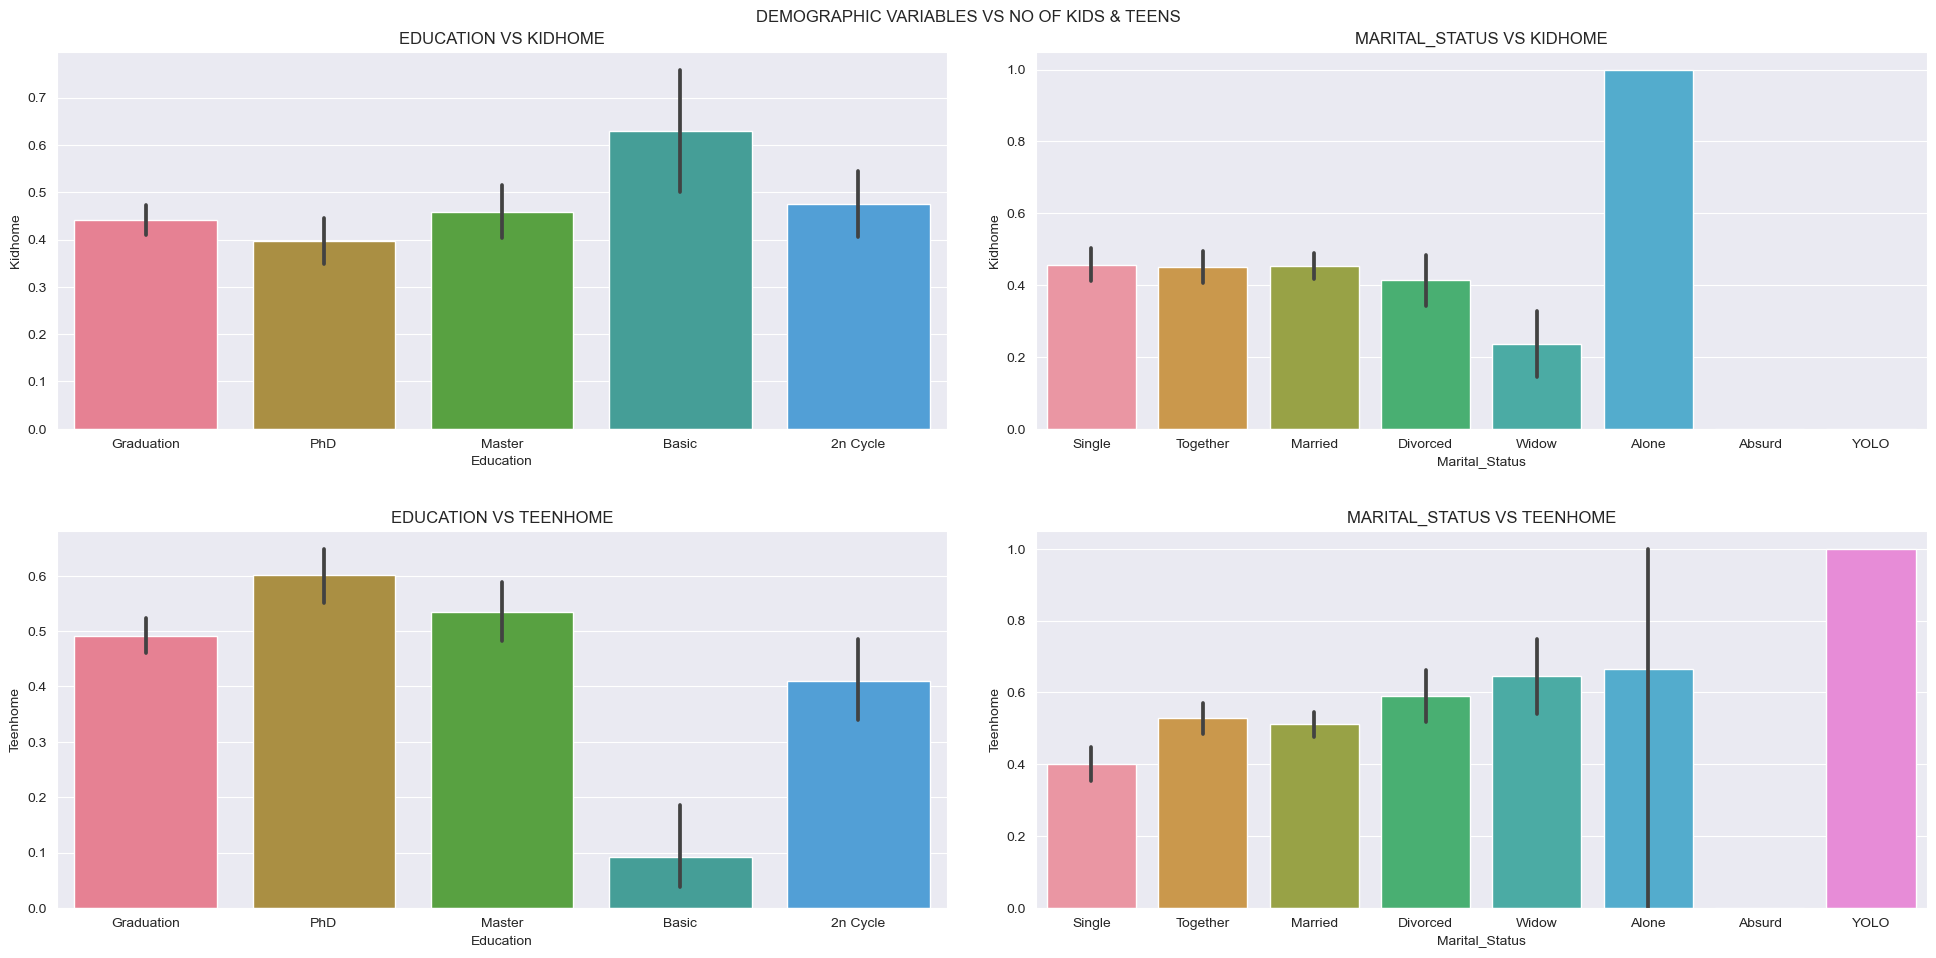

In [14]:
get_chart(x = ['Education', 'Marital_Status'],
          y = ['Kidhome', 'Teenhome'],
          dim= [2,2],
          title= 'DEMOGRAPHIC VARIABLES VS NO OF KIDS & TEENS')

### https://github.com/Muyiiwaa/random-python-notes

In [15]:
sales_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age'],
      dtype='object')

1. seaborn
2. pandas 
3. numpy
4. plotly
5. correlation
7. label and one-hot encoding
8. generate a list comprehension that encodes Education and marital status

### INSPECT CORRELATION


Correlation measures the relationship between two or more continuous variables

<Axes: >

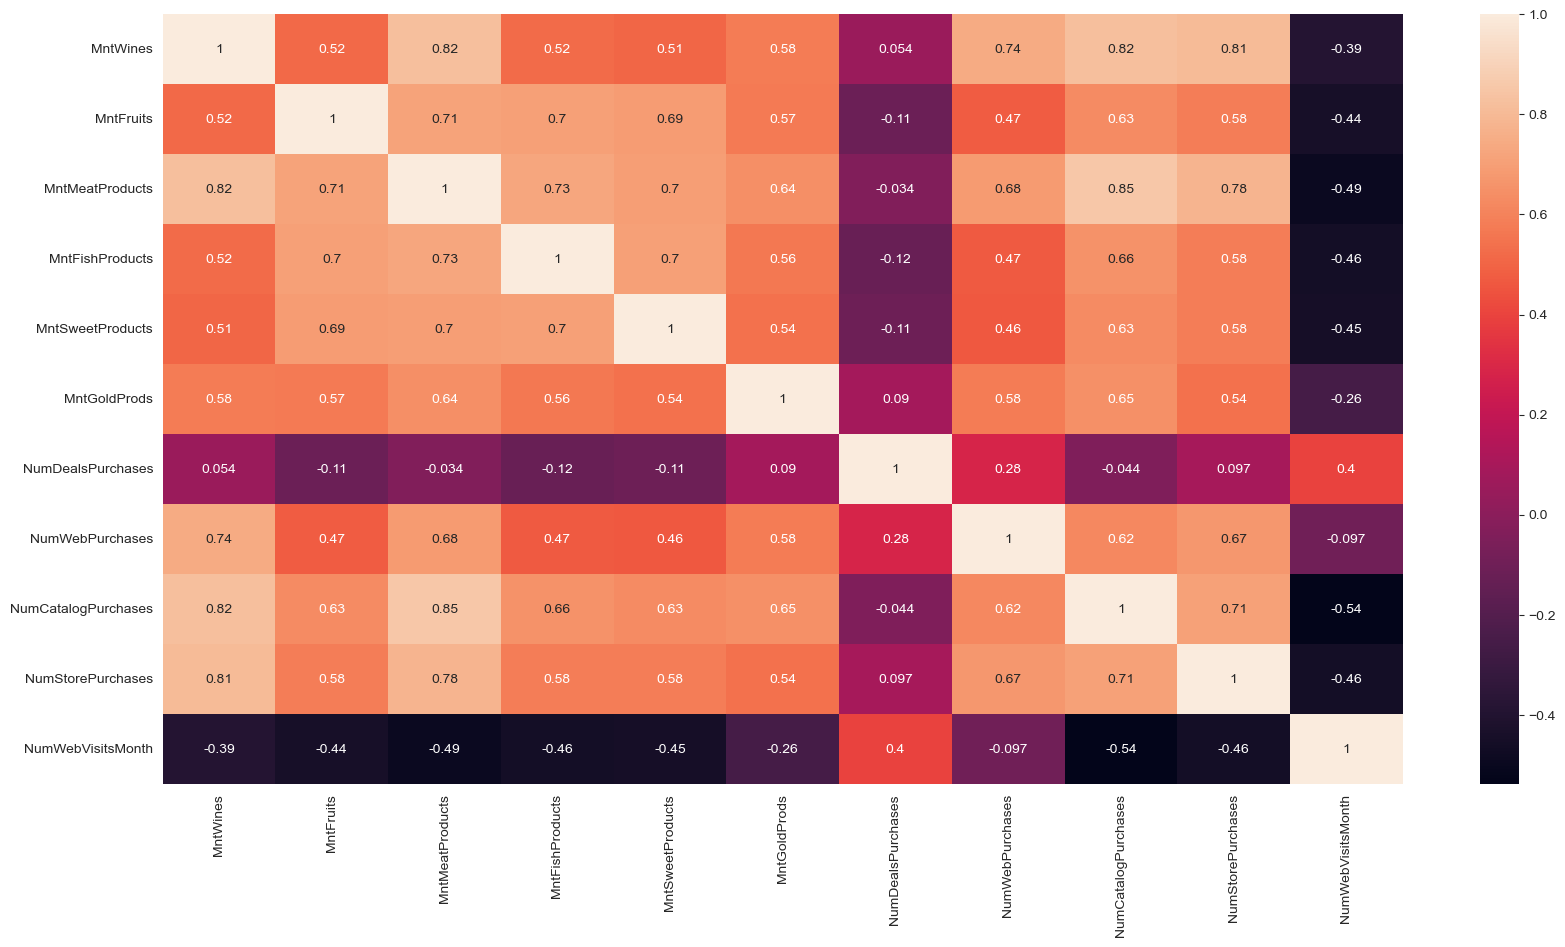

In [16]:
# inspecting correlation matrix 

corr_matrix = sales_df[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']].corr(method='spearman')



fig = plt.figure(figsize=(20,10))
sns.heatmap(data=corr_matrix, annot= True)

### Insight 

### Dimensionality Reduction

In [17]:
sales_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,...,0,0,0,0,0,0,3,11,1,67
1,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,...,0,0,0,0,0,0,3,11,0,70
2,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,3,11,0,59
3,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,...,0,0,0,0,0,0,3,11,0,40
4,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,0,3,11,0,43


In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le_encoder = LabelEncoder()
one_encoder = OneHotEncoder()

cat_cols = ['Education', 'Marital_Status']
for col in cat_cols:
    sales_df[col] = le_encoder.fit_transform(sales_df[col])

In [21]:
sales_df.drop(columns=['Dt_Customer'], inplace=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = scaler.fit_transform(sales_df)
data = pd.DataFrame(data=data, columns= sales_df.columns)

data.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,-0.350527,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,0.986443
1,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1.236801
2,-0.350527,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,0.318822


In [25]:
# reduced dimension

from sklearn.decomposition import PCA

pca = PCA(n_components= 3)

data = pca.fit_transform(data)
data = pd.DataFrame(data=data, columns= ['column1', 'column2','column3'])

data.head(3)


,column1,column2,column3
0,3.764219,-0.323325,-0.408121
1,-2.384403,0.167269,-0.252604
2,1.621791,-0.156771,-1.098879


In [ ]:
# what is PCA

In [29]:
# plotting scatter chart of the reduced columns 

px.scatter_3d(data_frame=data, x = 'column1',
              y = 'column2', z = 'column3')

In [30]:
# divide customers
kmeans = KMeans(n_clusters=4, n_init='auto')

preds = kmeans.fit_predict(data)

In [31]:
px.scatter_3d(data_frame=data, x = 'column1',
              y = 'column2', z = 'column3', color = preds)

In [32]:
sales_df['clusters'] = ['cluster1' if x==0 else 'cluster2'
                        if x == 1 else 'cluster3' if x == 2 else 'cluster4'
                        for x in preds]

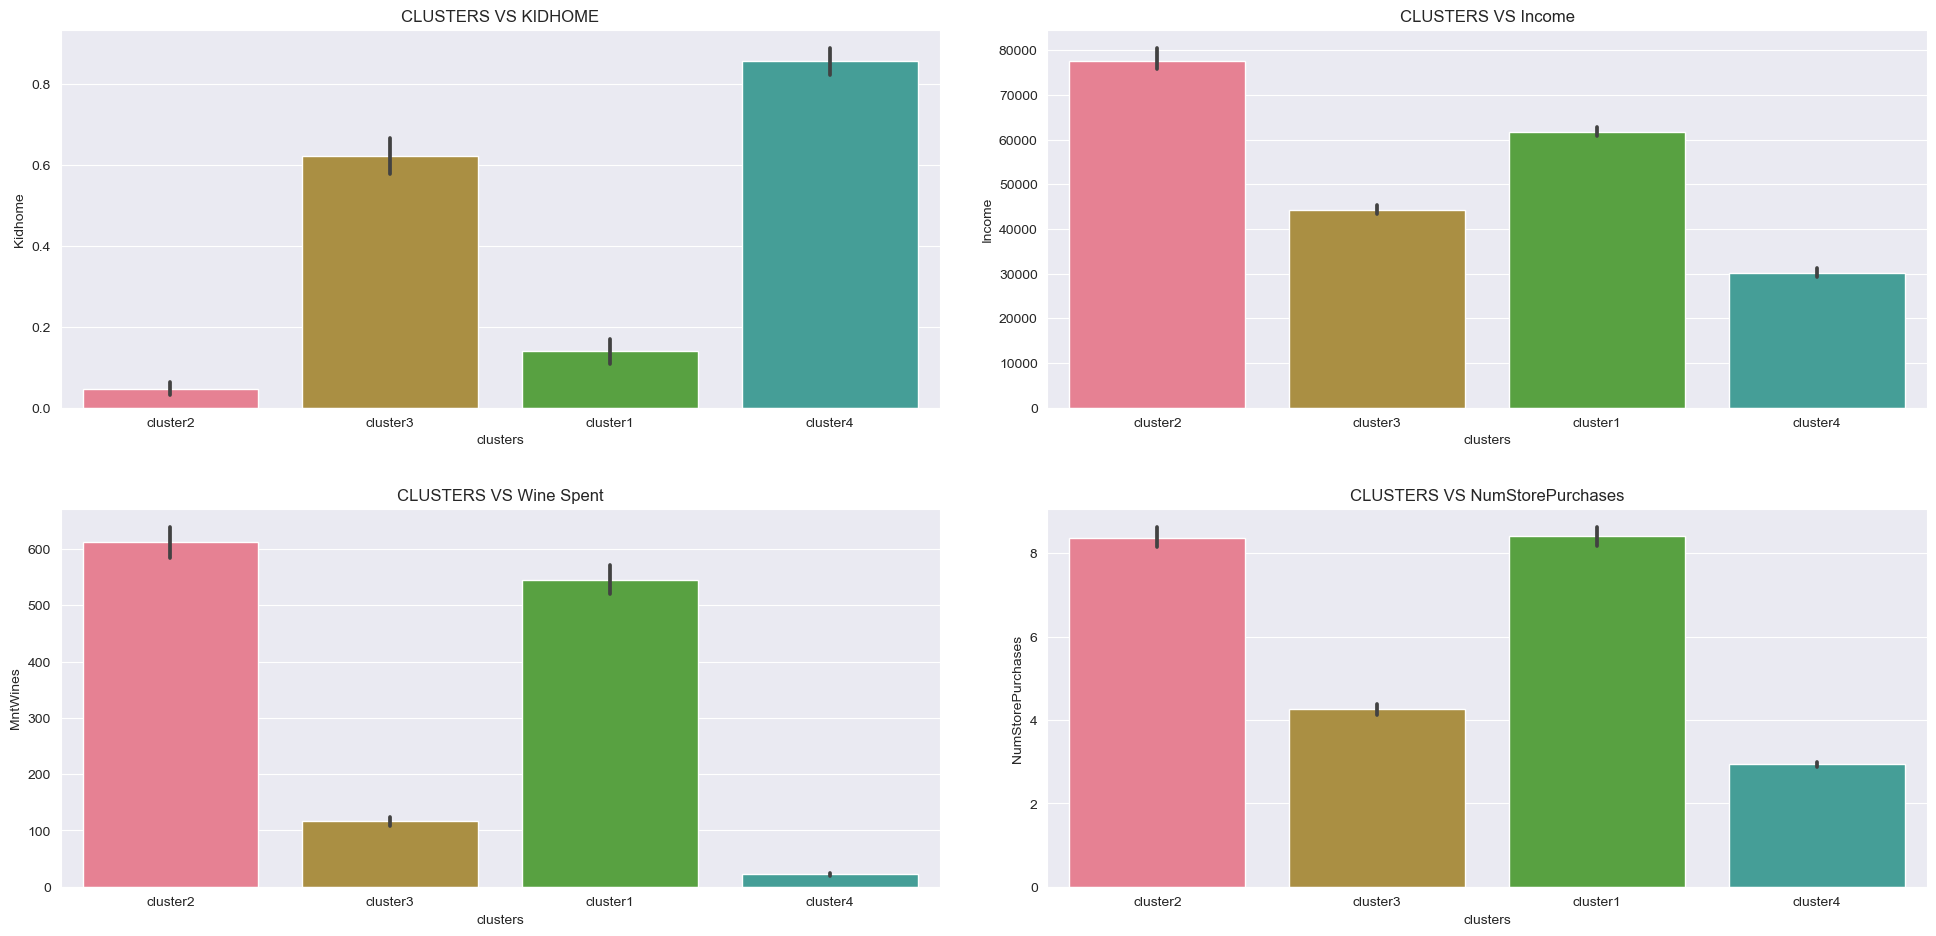

In [42]:
fig, axes = plt.subplots(2,2, figsize = (20,10))
sns.barplot(data=sales_df, x = 'clusters', y = 'Kidhome', ax= axes[0,0])
sns.barplot(data=sales_df, x = 'clusters', y = 'Income', ax= axes[0,1])
sns.barplot(data=sales_df, x = 'clusters', y = 'MntWines', ax= axes[1,0])
sns.barplot(data=sales_df, x = 'clusters', y = 'NumStorePurchases', ax= axes[1,1])
axes[0,0].set_title('CLUSTERS VS KIDHOME')
axes[0,1].set_title('CLUSTERS VS Income')
axes[1,0].set_title('CLUSTERS VS Wine Spent')
axes[1,1].set_title('CLUSTERS VS NumStorePurchases')

fig.tight_layout(pad=3)

## Findings and Recommedation

In [38]:
sales_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age',
       'clusters'],
      dtype='object')